<a href="https://colab.research.google.com/github/nickwharff/CS167_Notes/blob/main/Notebook3_wharff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook #3: Cross Validation with kNN and Wine Ratings
**Name: your name here**


Prepare the data

In [2]:
import pandas 
import numpy
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change the path so to access the data on your drive 
wine = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/winequality-white.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exercise #1. 
Implement mean squared error (mse) algorithm

In [59]:


def mse(actual,predicted):
    error1 = ((actual - predicted)**2)
    error2 = error1.sum()
    error3 = error2/len(actual)
    return error3


test1 = pandas.Series([1,2,3,4,5,6,7,8])
test2 = pandas.Series([2,3,4,5,6,7,8,9])


    # INPUT: 
    #   actual: a list of values
    #   predicted: a list of value
    #   (we assume that number of elements in actual and predicted match)
    # OUTPUT: 
    #   the mean squared error between the actual and predicted values
    # print("your code goes here")

print(mse(test1,test1))

0.0


# Exercise #2
Implement the testing and training data. Use the approximately the first 320 rows in the shuffled set as testing data. 

In [45]:
# change the path so to access the data on your drive 
wine = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/winequality-white.csv')

# establish test_data and train_data here

test_data = wine[0:320]
train_data = wine[320:]

# print(test_data.shape, training_data.shape)

# Exercise #3
Use the kNN implementation and the other code provided below to normalize your data. Test your model using several different values of k and **graphically show** the results using your implementation of **mse**.

In [46]:
import numpy

def regression_kNN(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = numpy.sqrt(
    (specimen['fixed acidity']-data['fixed acidity'])**2
    +(specimen['volatile acidity']-data['volatile acidity'])**2
    +(specimen['citric acid']-data['citric acid'])**2
    +(specimen['residual sugar']-data['residual sugar'])**2
    +(specimen['chlorides']-data['chlorides'])**2
    +(specimen['free sulfur dioxide']-data['free sulfur dioxide'])**2
    +(specimen['total sulfur dioxide']-data['total sulfur dioxide'])**2
    +(specimen['density']-data['density'])**2
    +(specimen['pH']-data['pH'])**2
    +(specimen['sulphates']-data['sulphates'])**2
    +(specimen['alcohol']-data['alcohol'])**2
    )
  sorted_data = data_copy.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:k]['quality'].mean()

In [47]:
def regressions_all_kNN(test_data,train_data,k):
    #apply the regression_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    results = []
    for i in range(len(test_data)):
      prediction = regression_kNN(test_data.iloc[i], train_data,k)
      results.append(prediction)
    return pandas.Series(results)

In [48]:
# normalize the data (part 1) -- calculate the mean and standard deviation values for the predictor columns
fixed_acidity_mean = train_data['fixed acidity'].mean()
fixed_acidity_std = train_data['fixed acidity'].std()
volatile_acidity_mean = train_data['volatile acidity'].mean()
volatile_acidity_std = train_data['volatile acidity'].std()
citric_acid_mean = train_data['citric acid'].mean()
citric_acid_std = train_data['citric acid'].std()
residual_sugar_mean = train_data['residual sugar'].mean()
residual_sugar_std = train_data['residual sugar'].std()
chlorides_mean = train_data['chlorides'].mean()
chlorides_std = train_data['chlorides'].std()
free_sulfur_dioxide_mean = train_data['free sulfur dioxide'].mean()
free_sulfur_dioxide_std = train_data['free sulfur dioxide'].std()
total_sulfur_dioxide_mean = train_data['total sulfur dioxide'].mean()
total_sulfur_dioxide_std = train_data['total sulfur dioxide'].std()
density_mean = train_data['density'].mean()
density_std = train_data['density'].std()
pH_mean = train_data['pH'].mean()
pH_std = train_data['pH'].std()
sulphates_mean = train_data['sulphates'].mean()
sulphates_std = train_data['sulphates'].std()
alcohol_mean = train_data['alcohol'].mean()
alcohol_std = train_data['alcohol'].std()


In [49]:
 # normalize the data (part 1) -- normalize both the training and testing data frames
train_norm_data = train_data.copy()
test_norm_data = test_data.copy()

# update the columns in train_norm_data 
train_norm_data['fixed acidity'] = (train_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
train_norm_data['volatile acidity'] = (train_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
train_norm_data['citric acid'] = (train_data['citric acid'] - citric_acid_mean)/citric_acid_std
train_norm_data['residual sugar'] = (train_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
train_norm_data['chlorides'] = (train_data['chlorides'] - chlorides_mean)/chlorides_std
train_norm_data['free sulfur dioxide'] = (train_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
train_norm_data['total sulfur dioxide'] = (train_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
train_norm_data['density'] = (train_data['density'] - density_mean)/density_std
train_norm_data['pH'] = (train_data['pH'] - pH_mean)/pH_std
train_norm_data['sulphates'] = (train_data['sulphates'] - sulphates_mean)/sulphates_std
train_norm_data['alcohol'] = (train_data['alcohol'] - alcohol_mean)/alcohol_std

# update the columns in test_norm_data 
test_norm_data['fixed acidity'] = (test_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
test_norm_data['volatile acidity'] = (test_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
test_norm_data['citric acid'] = (test_data['citric acid'] - citric_acid_mean)/citric_acid_std
test_norm_data['residual sugar'] = (test_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
test_norm_data['chlorides'] = (test_data['chlorides'] - chlorides_mean)/chlorides_std
test_norm_data['free sulfur dioxide'] = (test_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
test_norm_data['total sulfur dioxide'] = (test_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
test_norm_data['density'] = (test_data['density'] - density_mean)/density_std
test_norm_data['pH'] = (test_data['pH'] - pH_mean)/pH_std
test_norm_data['sulphates'] = (test_data['sulphates'] - sulphates_mean)/sulphates_std
test_norm_data['alcohol'] = (test_data['alcohol'] - alcohol_mean)/alcohol_std

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline


kvals=[]
for i in range(1,319,10):
    kvals.append(i)

kvals

target = test_data['quality']
mse_accuracy = []

for k in kvals:
    predictions = regressions_all_kNN(test_data,train_data,k)
    current_mse = mse(target,predictions)
    mse_accuracy.append(current_mse)


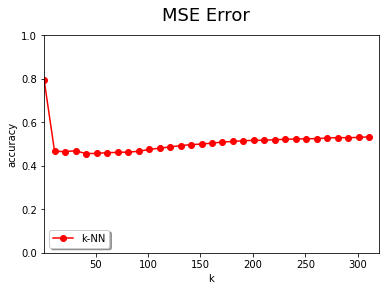

In [68]:
xvals = range(1,100)

plt.suptitle('MSE Error',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(kvals,mse_accuracy,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([1,320,0,1])

plt.show()

# Exercise #4
Repeat the experiment and **graphically show the results** using r^2.

In [55]:
import sklearn.metrics #we'll talk more about sklearn tomorrow

# r2_val = sklearn.metrics.r2_score(actual_vals, predicted_vals)

kNN_accuracies_r2 = []

for k in kvals:
    predictions2 = regressions_all_kNN(test_data,train_data,k)
    r2_val = sklearn.metrics.r2_score(test_data['quality'], predictions2)
    kNN_accuracies_r2.append(r2_val)



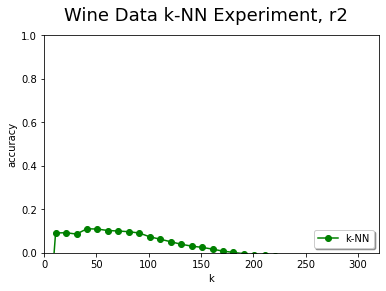

In [69]:

plt.suptitle('Wine Data k-NN Experiment, r2',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(kvals,kNN_accuracies_r2,'go-',label='k-NN')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,320,0,1])

plt.show()

# Exercise #5. 
Describe your findings. What conclusions can you draw about the best number for k for the k-NN algorithm for this data set? **Explain why.** Use a markdown cell to explain your conclusions.

Based off of the two graphs, the maxima for accuracy appears to be around k=50. Thus, this is the optimal number of NN. As K increases, the model most likely overfits, causing it to be unable to work on the test data. 